In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# URL du fichier CSV
csv_url = "https://ai-jobs.net/salaries/download/salaries.csv"

# Télécharger le fichier CSV
response = requests.get(csv_url)

# Sauvegarder le fichier CSV localement
with open("salaries.csv", "wb") as file:
    file.write(response.content)

# Charger le fichier CSV dans un DataFrame pandas
salaries_df = pd.read_csv("salaries.csv")

# Afficher les premières lignes du DataFrame
print(salaries_df.head())


   work_year experience_level employment_type             job_title  salary  \
0       2024               EN              FT  Admin & Data Analyst  300000   
1       2024               SE              FT        Data Architect  184000   
2       2024               SE              FT        Data Architect  123000   
3       2024               SE              FT        Data Scientist  235400   
4       2024               SE              FT        Data Scientist  188748   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         300000                 IN           100   
1             USD         184000                 US             0   
2             USD         123000                 US             0   
3             USD         235400                 US           100   
4             USD         188748                 US           100   

  company_location company_size  
0               IN            L  
1               US            M  
2       

# Features Explaination
- work_year : The year the salary was paid.
- experience_level : The experience level in the job during the year with the following possible values: EN Entry-level / Junior - MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
- employment_type : The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
- job_title : The role worked in during the year.
- salary : The total gross salary amount paid.
- salary_currency : The currency of the salary paid as an ISO 4217 currency code.
- salary_in_usd : The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- employee_residence : Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio : The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 - Partially remote 100 Fully remote (more than 80%)
- company_location : The country of the employer's main office or contracting branch as an ISO 3166 country code.
- company_size : The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large) 

In [3]:
df = pd.read_csv('https://ai-jobs.net/salaries/download/salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,EN,FT,Admin & Data Analyst,300000,USD,300000,IN,100,IN,L
1,2024,SE,FT,Data Architect,184000,USD,184000,US,0,US,M
2,2024,SE,FT,Data Architect,123000,USD,123000,US,0,US,M
3,2024,SE,FT,Data Scientist,235400,USD,235400,US,100,US,M
4,2024,SE,FT,Data Scientist,188748,USD,188748,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
21208,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
21209,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
21210,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
21211,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


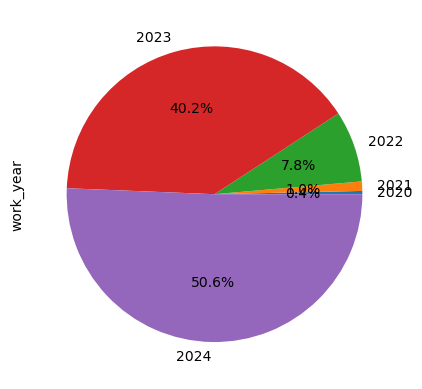

In [4]:
df.groupby('work_year')['work_year'].count().plot.pie(autopct="%1.1f%%");

In [5]:
df['work_year'].value_counts()


work_year
2024    10743
2023     8521
2022     1656
2021      218
2020       75
Name: count, dtype: int64

# Remarques:

- Les valeurs des colonnes "experience_level", "employment_type", "remote_ratio" et "company_size" doivent être redéfinies.
- Les colonnes "work_year", "salary", "salary_in_usd" et "remote_ratio" sont numériques.
- Plus de 50% des données sont de l'année 2022.

# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21213 entries, 0 to 21212
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           21213 non-null  int64 
 1   experience_level    21213 non-null  object
 2   employment_type     21213 non-null  object
 3   job_title           21213 non-null  object
 4   salary              21213 non-null  int64 
 5   salary_currency     21213 non-null  object
 6   salary_in_usd       21213 non-null  int64 
 7   employee_residence  21213 non-null  object
 8   remote_ratio        21213 non-null  int64 
 9   company_location    21213 non-null  object
 10  company_size        21213 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.8+ MB


In [8]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
# On vérifie s'il y a des lignes dupliquées qu'on les enlève si on les trouve
df.duplicated().sum()

9001

In [10]:
df[df.duplicated(keep=False)].sort_values('job_title').head(6)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16303,2023,SE,FT,AI Architect,330000,USD,330000,US,0,US,M
16105,2023,SE,FT,AI Architect,330000,USD,330000,US,0,US,M
15765,2023,SE,FT,AI Architect,330000,USD,330000,US,0,US,M
16304,2023,SE,FT,AI Architect,204000,USD,204000,US,0,US,M
14952,2023,SE,FT,AI Architect,204000,USD,204000,US,0,US,M
14951,2023,SE,FT,AI Architect,330000,USD,330000,US,0,US,M


In [11]:
# On enlève les lignes dupliquées
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
# Reset Index
df = df.reset_index(drop=True)

## On renomme les valeurs des colonnes 

In [14]:
# Experience Level
df.experience_level.replace(['EN','MI','SE','EX'],['Entry-level','Mid-level','Senior-level', 'Expert-level'], inplace=True)

# Employment Type
df.employment_type.replace(['PT','CT','FT','FL'],['Part-time','Contract','Full-time', 'Freelance'], inplace=True)

# Remote Ratio
df.remote_ratio.replace([0,50,100],['Onsite','Hybrid','Remote'], inplace=True)

# Company Size
df.company_size.replace(['S','M','L'],['Small','Medium','Large'], inplace=True)

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,Entry-level,Full-time,Admin & Data Analyst,300000,USD,300000,IN,Remote,IN,Large
1,2024,Senior-level,Full-time,Data Architect,184000,USD,184000,US,Onsite,US,Medium
2,2024,Senior-level,Full-time,Data Architect,123000,USD,123000,US,Onsite,US,Medium
3,2024,Senior-level,Full-time,Data Scientist,235400,USD,235400,US,Remote,US,Medium
4,2024,Senior-level,Full-time,Data Scientist,188748,USD,188748,US,Remote,US,Medium


In [15]:
# Les valeurs uniques de chaque colonne

dict = {}
for col in df.columns:
    dict[col] = df[col].value_counts().shape[0]

pd.DataFrame(dict, index=['unique value count']).transpose()

,unique value count
work_year,5
experience_level,4
employment_type,4
job_title,157
salary,3132
salary_currency,24
salary_in_usd,3535
employee_residence,88
remote_ratio,3
company_location,78


In [16]:


df.describe()

,work_year,salary,salary_in_usd
count,12212.000000,1.221200e+04,12212.000000
mean,2023.369882,1.672004e+05,147630.588274
std,0.770443,3.951429e+05,73000.597053
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,9.550000e+04,95000.000000
50%,2024.000000,1.400000e+05,138900.000000
75%,2024.000000,1.900000e+05,187500.000000
max,2024.000000,3.040000e+07,800000.000000


In [17]:

# Separate columns into numerical and categorical
all_columns = df.columns.to_list()
numerical = ['work_year', 'salary', 'salary_in_usd']
categorical = list(set(all_columns) - set(numerical))

In [18]:
#  parcourt les colonnes catégorielles du DataFrame df et affiche les valeurs uniques et leur fréquence pour chaque colonne
for i in df[categorical].columns:
    x = df[categorical][i].value_counts()
    print(i)
    print(x,'\n')

salary_currency
salary_currency
USD    11060
GBP      553
EUR      413
CAD       60
INR       56
AUD       12
PLN        9
CHF        8
SGD        6
BRL        5
DKK        4
TRY        4
JPY        4
ZAR        3
HUF        3
ILS        2
NOK        2
THB        2
SEK        1
NZD        1
PHP        1
HKD        1
MXN        1
CLP        1
Name: count, dtype: int64 

experience_level
experience_level
Senior-level    6986
Mid-level       3495
Entry-level     1283
Expert-level     448
Name: count, dtype: int64 

job_title
job_title
Data Scientist                   2545
Data Engineer                    2205
Data Analyst                     1649
Machine Learning Engineer        1239
Research Scientist                478
                                 ... 
Big Data Developer                  1
AWS Data Architect                  1
Analytics Engineering Manager       1
Quantitative Research Analyst       1
Deep Learning Researcher            1
Name: count, Length: 157, dtype: int64 

emp

In [19]:
# Separate columns into numerical and categorical
all_columns = df.columns.to_list()
numerical = ['work_year', 'salary', 'salary_in_usd']
categorical = list(set(all_columns) - set(numerical))

In [20]:
df[numerical]

,work_year,salary,salary_in_usd
0,2024,300000,300000
1,2024,184000,184000
2,2024,123000,123000
3,2024,235400,235400
4,2024,188748,188748
...,...,...,...
12207,2020,412000,412000
12208,2021,151000,151000
12209,2020,105000,105000
12210,2020,100000,100000


In [21]:
df[numerical].describe()

,work_year,salary,salary_in_usd
count,12212.000000,1.221200e+04,12212.000000
mean,2023.369882,1.672004e+05,147630.588274
std,0.770443,3.951429e+05,73000.597053
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,9.550000e+04,95000.000000
50%,2024.000000,1.400000e+05,138900.000000
75%,2024.000000,1.900000e+05,187500.000000
max,2024.000000,3.040000e+07,800000.000000


In [22]:
df[categorical]

,salary_currency,experience_level,job_title,employment_type,company_location,employee_residence,remote_ratio,company_size
0,USD,Entry-level,Admin & Data Analyst,Full-time,IN,IN,Remote,Large
1,USD,Senior-level,Data Architect,Full-time,US,US,Onsite,Medium
2,USD,Senior-level,Data Architect,Full-time,US,US,Onsite,Medium
3,USD,Senior-level,Data Scientist,Full-time,US,US,Remote,Medium
4,USD,Senior-level,Data Scientist,Full-time,US,US,Remote,Medium
...,...,...,...,...,...,...,...,...
12207,USD,Senior-level,Data Scientist,Full-time,US,US,Remote,Large
12208,USD,Mid-level,Principal Data Scientist,Full-time,US,US,Remote,Large
12209,USD,Entry-level,Data Scientist,Full-time,US,US,Remote,Small
12210,USD,Entry-level,Business Data Analyst,Contract,US,US,Remote,Large


C:\Users\ulukb\AppData\Local\Temp\ipykernel_24940\898518236.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ulukb\AppData\Local\Temp\ipykernel_24940\898518236.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


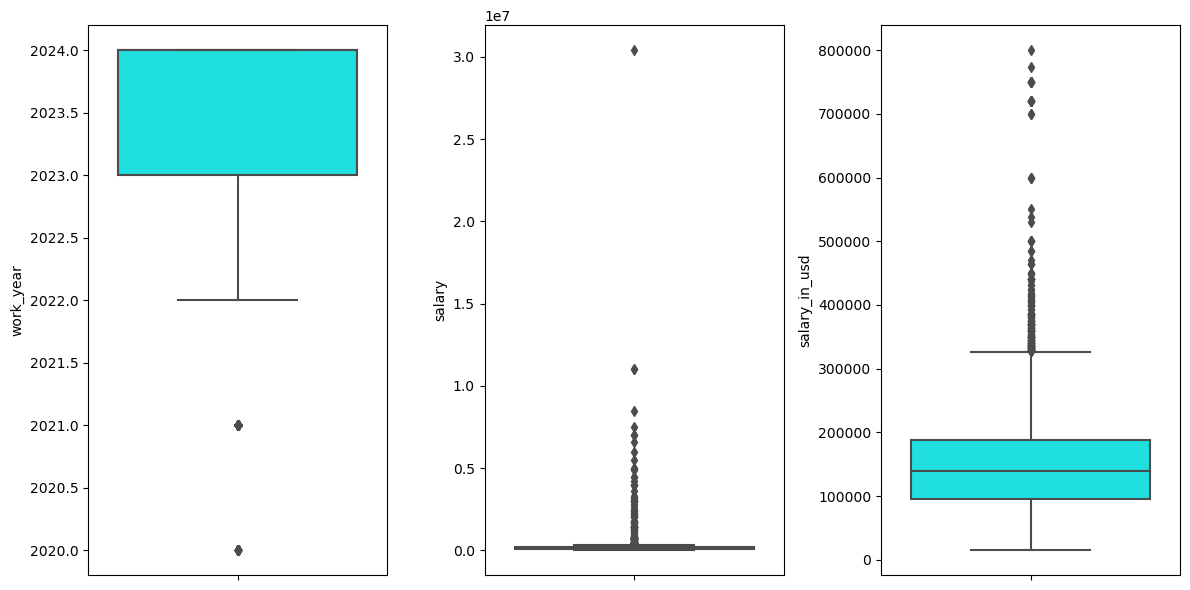

In [26]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()
     


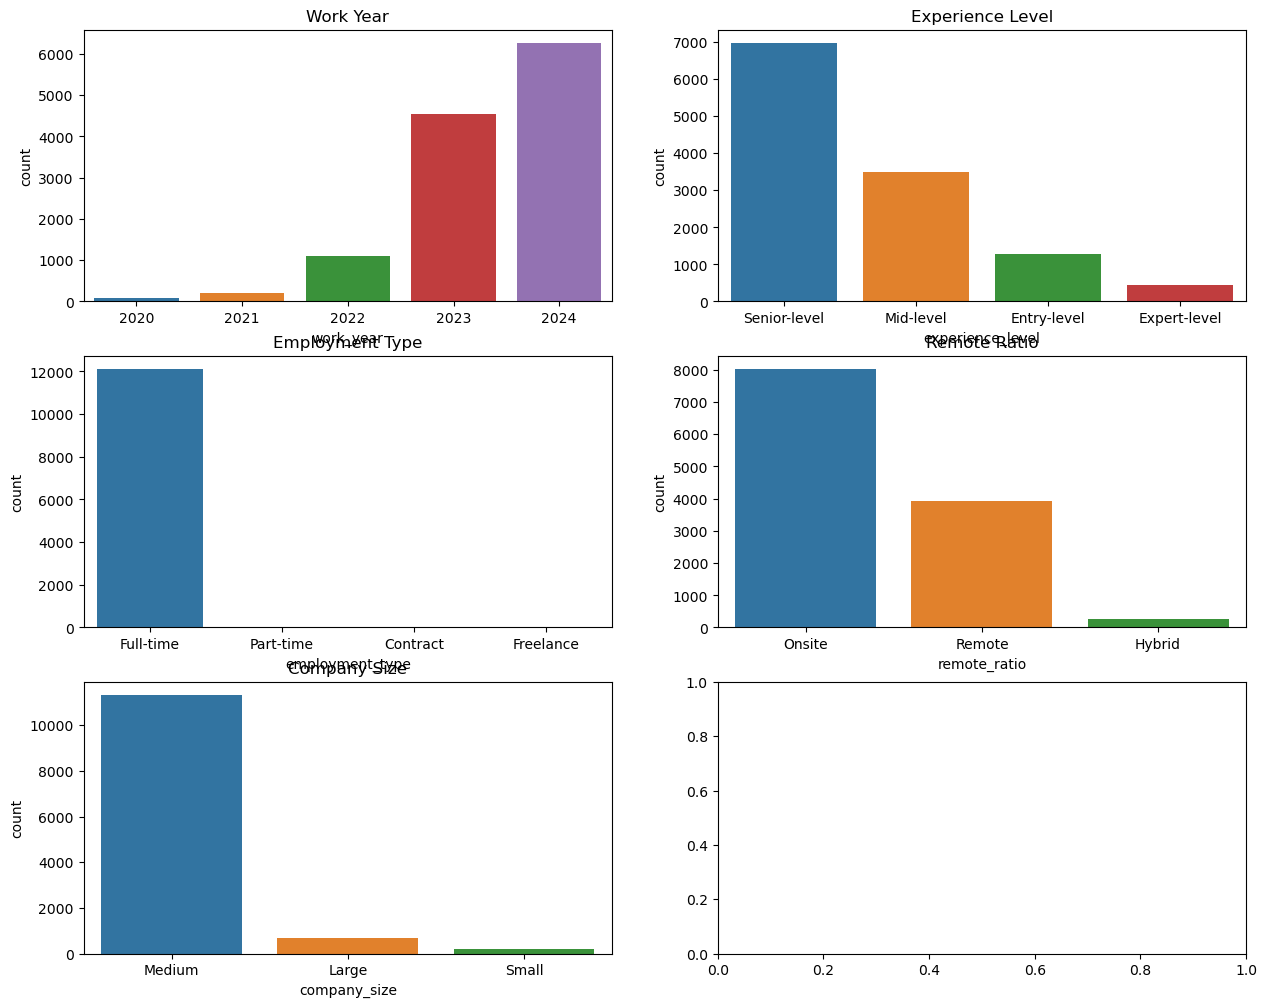

In [27]:
fig, axes = plt.subplots(3, 2, figsize = (15, 12))

sns.barplot(x = df["work_year"].value_counts().sort_values(ascending = False).index, y = df["work_year"].value_counts().sort_values(ascending = False), ax = axes[0][0])
axes[0][0].set_title("Work Year")

sns.barplot(x = df["experience_level"].value_counts().sort_values(ascending = False).index, y = df["experience_level"].value_counts().sort_values(ascending = False), ax = axes[0][1])
axes[0][1].set_title("Experience Level")

sns.barplot(x = df["employment_type"].value_counts().sort_values(ascending = False).index, y = df["employment_type"].value_counts().sort_values(ascending = False), ax = axes[1][0])
axes[1][0].set_title("Employment Type")

sns.barplot(x = df["remote_ratio"].value_counts().sort_values(ascending = False).index, y = df["remote_ratio"].value_counts().sort_values(ascending = False), ax = axes[1][1])
axes[1][1].set_title("Remote Ratio")

sns.barplot(x = df["company_size"].value_counts().sort_values(ascending = False).index, y = df["company_size"].value_counts().sort_values(ascending = False), ax = axes[2][0])
axes[2][0].set_title("Company Size");
     

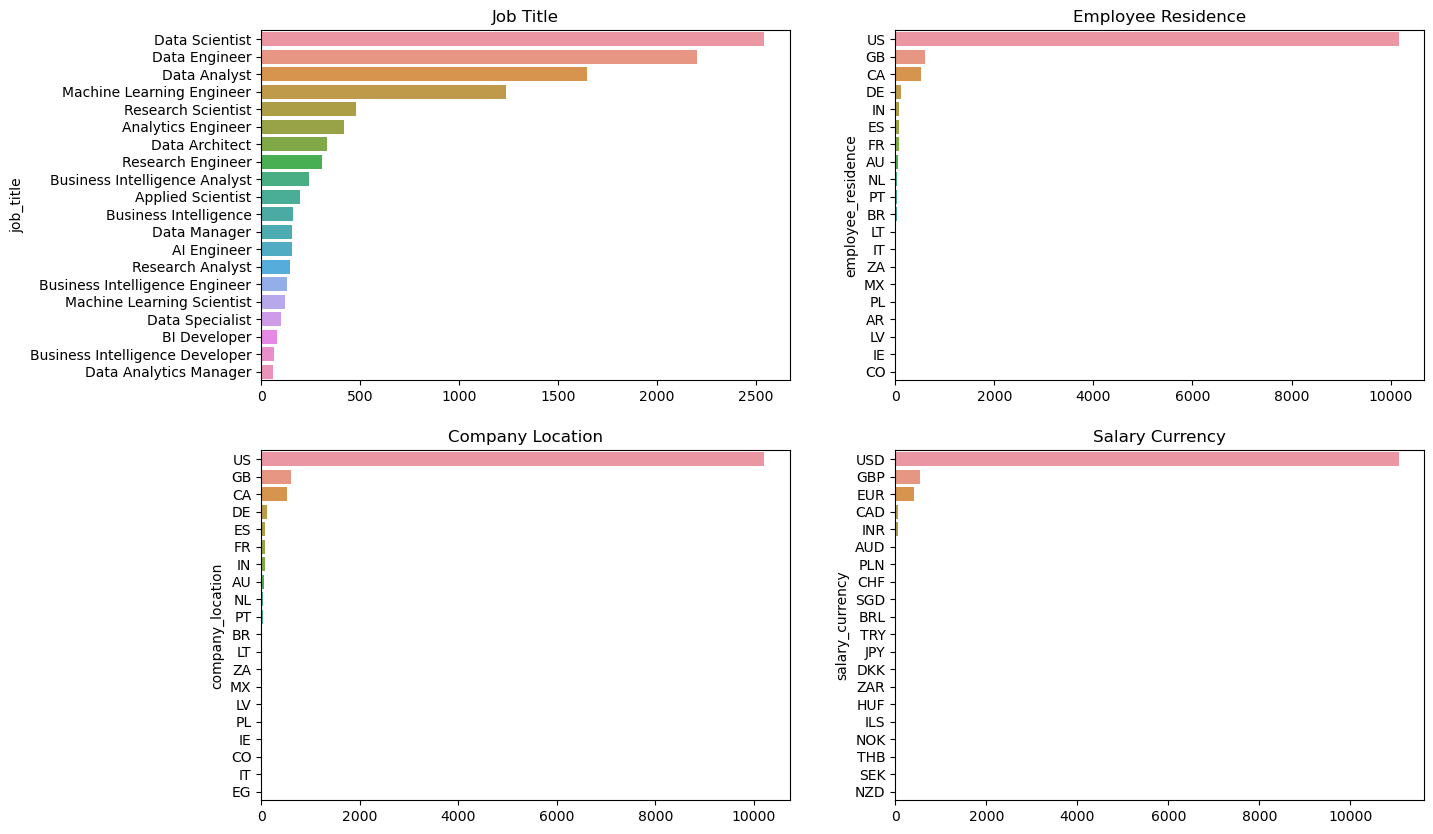

In [28]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.barplot(x = df["job_title"].value_counts().sort_values(ascending = False).head(20), 
            y = df["job_title"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[0][0])
axes[0][0].set_title("Job Title")
axes[0][0].set_xlabel("")

sns.barplot(x = df["employee_residence"].value_counts().sort_values(ascending = False).head(20), 
            y = df["employee_residence"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[0][1])
axes[0][1].set_title("Employee Residence")
axes[0][1].set_xlabel("")

sns.barplot(x = df["company_location"].value_counts().sort_values(ascending = False).head(20), 
            y = df["company_location"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[1][0])
axes[1][0].set_title("Company Location")
axes[1][0].set_xlabel("")

sns.barplot(x = df["salary_currency"].value_counts().sort_values(ascending = False).head(20), 
            y = df["salary_currency"].value_counts().sort_values(ascending = False).head(20).index, ax = axes[1][1])
axes[1][1].set_title("Salary Currency")
axes[1][1].set_xlabel("");
     

## What is job with the highest salary in Data Science?


TypeError: 'str' object is not callable

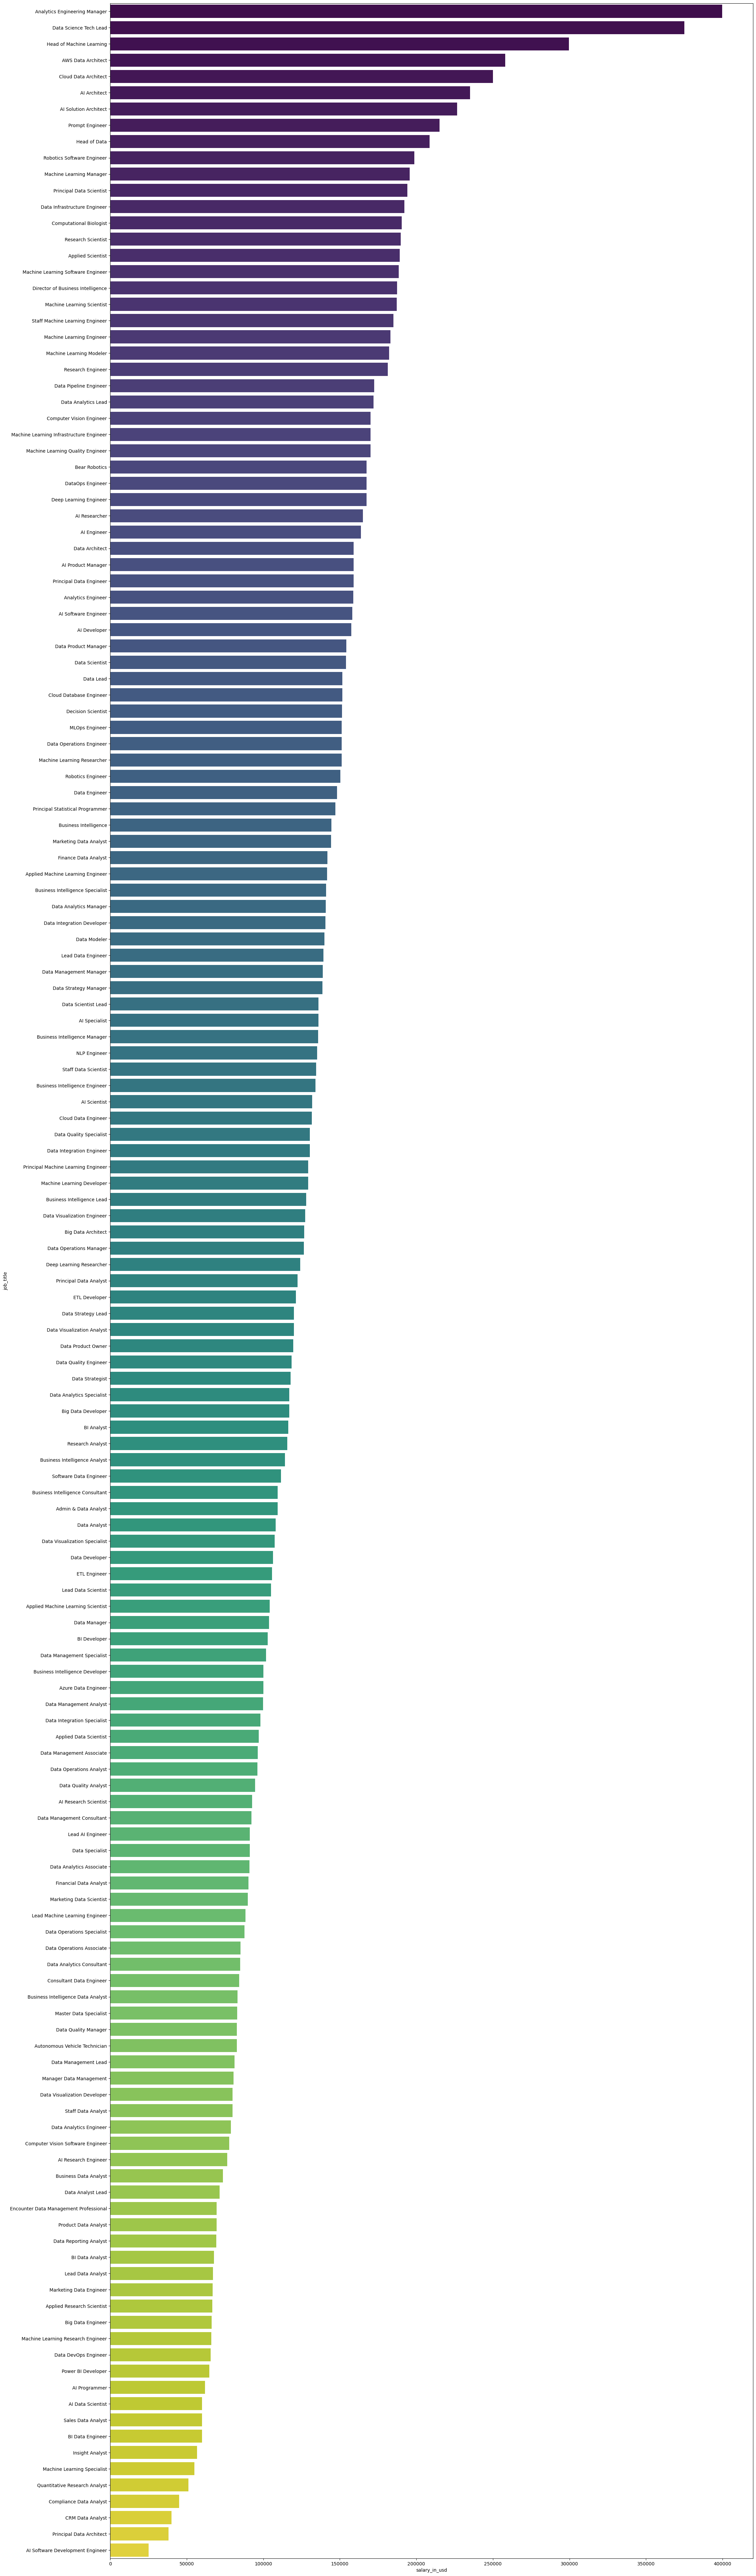

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir la taille de la figure
plt.figure(figsize=(25, 100))

# Calculer la moyenne des salaires par titre de poste
mean_salaries = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False)

# Créer un graphique à barres
sns.barplot(x=mean_salaries, y=mean_salaries.index, palette="viridis")

# Définir les étiquettes des axes et le titre
plt.xlabel("Salary in USD")
plt.title("Highest Salary Jobs")

# Afficher le graphique
plt.show()

     

In [36]:

dftopsalary = ['salary_in_usd', 'job_title']
df[dftopsalary].max()

salary_in_usd                             800000
job_title        Staff Machine Learning Engineer
dtype: object

In [37]:

df[dftopsalary].min()

salary_in_usd           15000
job_title        AI Architect
dtype: object

In [39]:

df.salary.value_counts()

salary
100000    183
150000    159
120000    145
80000     128
110000    121
         ... 
98800       1
124650      1
51120       1
67095       1
412000      1
Name: count, Length: 3132, dtype: int64

In [41]:

df24 = df[df["work_year"] == 2024]
df24.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,Entry-level,Full-time,Admin & Data Analyst,300000,USD,300000,IN,Remote,IN,Large
1,2024,Senior-level,Full-time,Data Architect,184000,USD,184000,US,Onsite,US,Medium
2,2024,Senior-level,Full-time,Data Architect,123000,USD,123000,US,Onsite,US,Medium
3,2024,Senior-level,Full-time,Data Scientist,235400,USD,235400,US,Remote,US,Medium
4,2024,Senior-level,Full-time,Data Scientist,188748,USD,188748,US,Remote,US,Medium


In [42]:
df24.job_title.value_counts().head(10)


job_title
Data Scientist                   1234
Data Engineer                    1003
Data Analyst                      815
Machine Learning Engineer         607
Research Scientist                293
Research Engineer                 192
Analytics Engineer                191
Data Architect                    172
Business Intelligence Analyst     170
Business Intelligence             159
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Data Science Jobs in 2024')

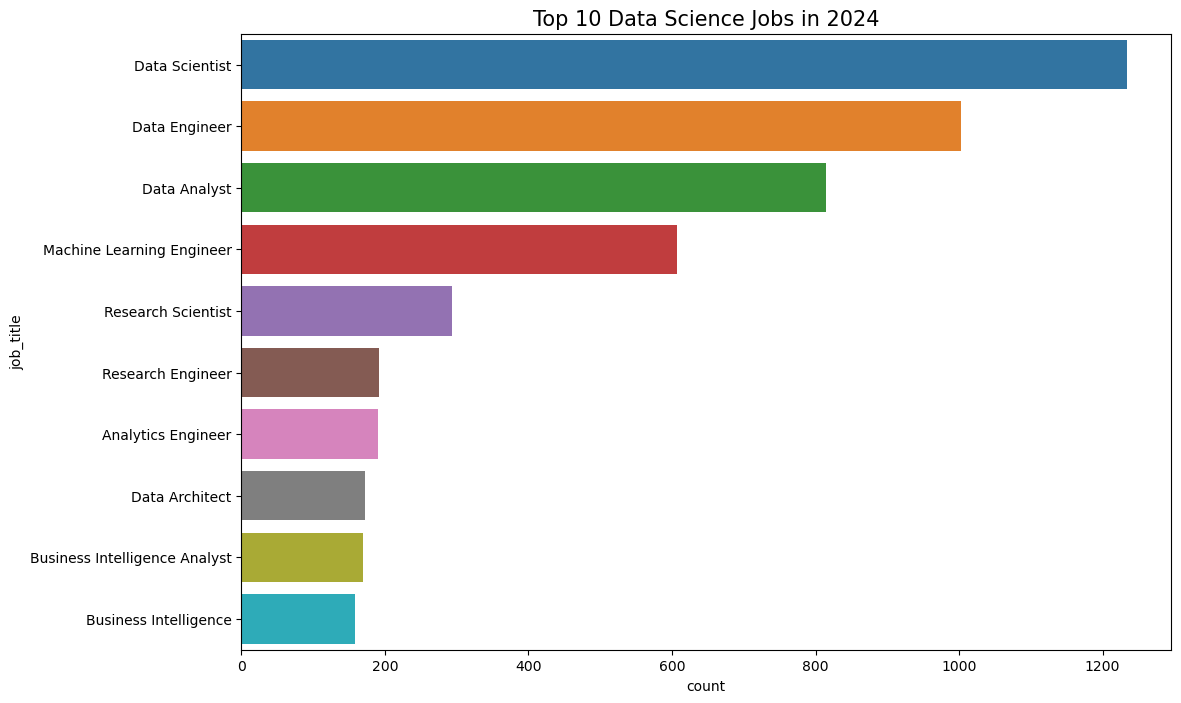

In [43]:
# Set the figure size
plt.figure(figsize = (12, 8))

# plot a bar chart
sns.barplot(x = df24["job_title"].value_counts().sort_values(ascending = False).head(10), 
            y = df24["job_title"].value_counts().sort_values(ascending = False).head(10).index)
plt.title('Top 10 Data Science Jobs in 2024', fontsize = 15)

Text(0.5, 1.0, 'Variation of remote ratio from 2020-2024')

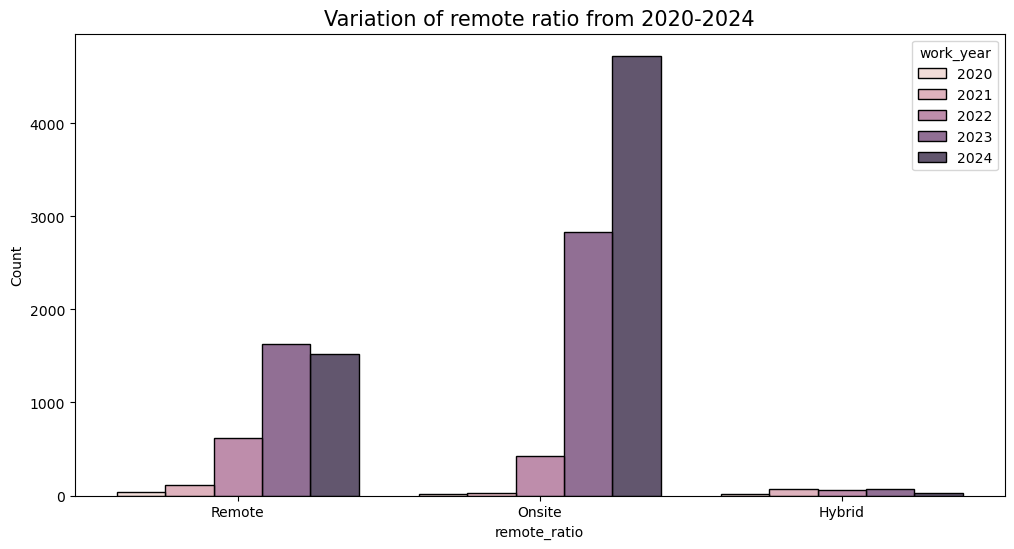

In [45]:
# Set the figure size
plt.figure(figsize = (12,6))

# plot a hist chart
sns.histplot(data = df, x = 'remote_ratio', hue = 'work_year', multiple = 'dodge', shrink = 0.8)
plt.title('Variation of remote ratio from 2020-2024', fontsize = 15)

Text(0.5, 1.0, 'Salary variation with exprience level')

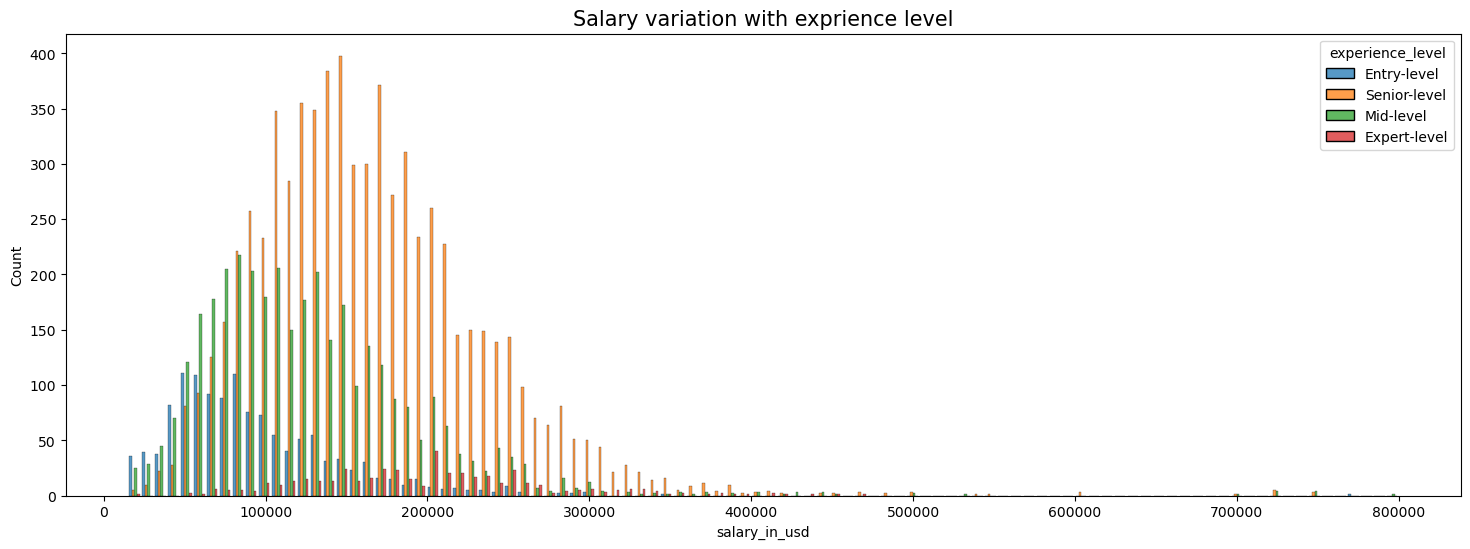

In [46]:
# Set the figure size
plt.figure(figsize = (18,6))

# plot a hist chart
sns.histplot(data = df, x = df.salary_in_usd, hue = 'experience_level', multiple = 'dodge', shrink = 0.8)
plt.title('Salary variation with exprience level', fontsize = 15)
     

Text(0.5, 1.0, 'Company Locations with Most Workers')

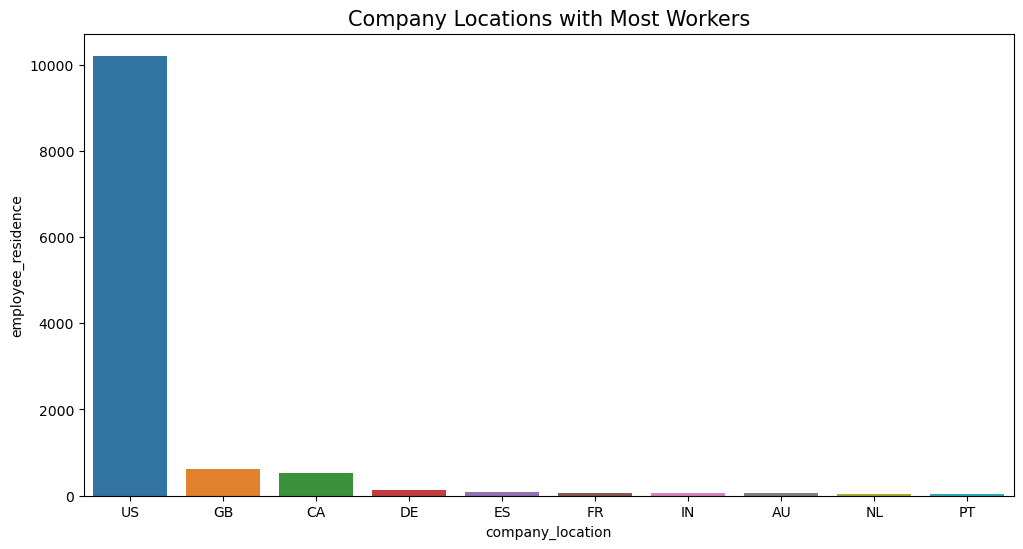

In [47]:
# Set the figure size
plt.figure(figsize = (12,6))

# plot a bar chart
sns.barplot(x = df.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10).index, 
            y = df.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10))
plt.title("Company Locations with Most Workers", fontsize = 15)
     

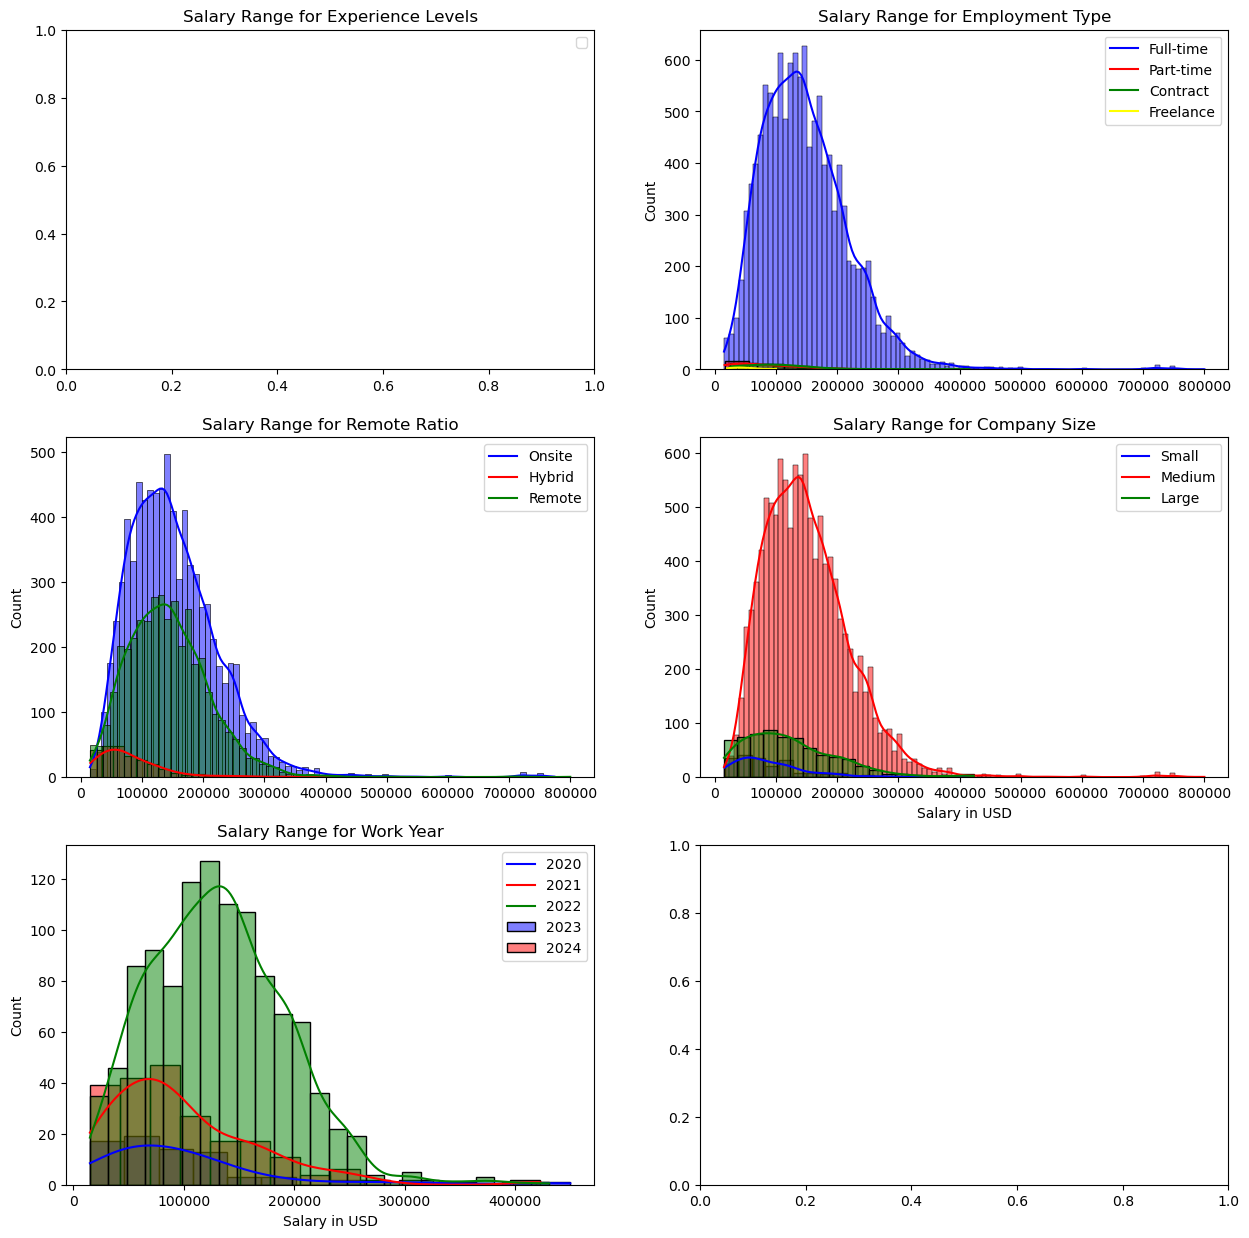

In [49]:
fig, axes = plt.subplots(3, 2, figsize = (15, 15))

sns.histplot(df.query("experience_level == 'Entry'")["salary_in_usd"], kde = True, color = "blue", ax = axes[0][0])
sns.histplot(df.query("experience_level == 'Junior'")["salary_in_usd"], kde = True, color = "red", ax = axes[0][0])
sns.histplot(df.query("experience_level == 'Senior'")["salary_in_usd"], kde = True, color = "green", ax = axes[0][0])
sns.histplot(df.query("experience_level == 'Expert'")["salary_in_usd"], kde = True, color = "yellow", ax = axes[0][0])
axes[0][0].legend(labels = ["Entry", "Junior", "Senior", "Expert"])
axes[0][0].set_xlabel("")
axes[0][0].set_title("Salary Range for Experience Levels")

sns.histplot(df.query("employment_type == 'Full-time'")["salary_in_usd"], kde = True, color = "blue", ax = axes[0][1])
sns.histplot(df.query("employment_type == 'Part-time'")["salary_in_usd"], kde = True, color = "red", ax = axes[0][1])
sns.histplot(df.query("employment_type == 'Contract'")["salary_in_usd"], kde = True, color = "green", ax = axes[0][1])
sns.histplot(df.query("employment_type == 'Freelance'")["salary_in_usd"], kde = True, color = "yellow", ax = axes[0][1])
axes[0][1].legend(labels = ["Full-time", "Part-time", "Contract", "Freelance"])
axes[0][1].set_xlabel("")
axes[0][1].set_title("Salary Range for Employment Type")

sns.histplot(df.query("remote_ratio == 'Onsite'")["salary_in_usd"], kde = True, color = "blue", ax = axes[1][0])
sns.histplot(df.query("remote_ratio == 'Hybrid'")["salary_in_usd"], kde = True, color = "red", ax = axes[1][0])
sns.histplot(df.query("remote_ratio == 'Remote'")["salary_in_usd"], kde = True, color = "green", ax = axes[1][0])
axes[1][0].legend(labels = ["Onsite", "Hybrid", "Remote"])
axes[1][0].set_xlabel("")
axes[1][0].set_title("Salary Range for Remote Ratio")

sns.histplot(df.query("company_size == 'Small'")["salary_in_usd"], kde = True, color = "blue", ax = axes[1][1])
sns.histplot(df.query("company_size == 'Medium'")["salary_in_usd"], kde = True, color = "red", ax = axes[1][1])
sns.histplot(df.query("company_size == 'Large'")["salary_in_usd"], kde = True, color = "green", ax = axes[1][1])
axes[1][1].legend(labels = ["Small", "Medium", "Large"])
axes[1][1].set_xlabel("Salary in USD")
axes[1][1].set_title("Salary Range for Company Size")

sns.histplot(df.query("work_year == 2020")["salary_in_usd"], kde = True, color = "blue", ax = axes[2][0])
sns.histplot(df.query("work_year == 2021")["salary_in_usd"], kde = True, color = "red", ax = axes[2][0])
sns.histplot(df.query("work_year == 2022")["salary_in_usd"], kde = True, color = "green", ax = axes[2][0])
axes[2][0].legend(labels = ["2020", "2021", "2022", "2023", "2024"])
axes[2][0].set_xlabel("Salary in USD")
axes[2][0].set_title("Salary Range for Work Year");
     

# On va prédire les salaires des TOP 3 uniquement

In [51]:
df2 = df[df['job_title'].isin(['Data Engineer', 'Data Scientist', 'Data Analyst'])]


In [52]:
df2['job_title'].value_counts()

job_title
Data Scientist    2545
Data Engineer     2205
Data Analyst      1649
Name: count, dtype: int64

In [53]:
df2 = df2.drop(['work_year', 'salary_currency', 'salary'],axis=1)

In [54]:
# is the working country same as residence country?
df2['same_working_country'] = df2.apply(lambda x:  'Local Worker' 
                                      if x['employee_residence'] == x['company_location'] 
                                      else 'Expatriate', axis=1)

df2 = df2.drop(['employee_residence','company_location'],axis=1)

print("STATUS: Added column same_working_country")

STATUS: Added column same_working_country


In [55]:
df2['same_working_country'].value_counts()

same_working_country
Local Worker    6347
Expatriate        52
Name: count, dtype: int64

In [56]:
# Reset Index
df2 = df2.reset_index(drop=True)
df2

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,same_working_country
0,Senior-level,Full-time,Data Scientist,235400,Remote,Medium,Local Worker
1,Senior-level,Full-time,Data Scientist,188748,Remote,Medium,Local Worker
2,Senior-level,Full-time,Data Scientist,196900,Onsite,Medium,Local Worker
3,Senior-level,Full-time,Data Scientist,175420,Onsite,Medium,Local Worker
4,Senior-level,Full-time,Data Analyst,200000,Remote,Medium,Local Worker
...,...,...,...,...,...,...,...
6394,Mid-level,Full-time,Data Scientist,119059,Remote,Medium,Expatriate
6395,Mid-level,Full-time,Data Engineer,28369,Hybrid,Large,Local Worker
6396,Senior-level,Full-time,Data Scientist,412000,Remote,Large,Local Worker
6397,Entry-level,Full-time,Data Scientist,105000,Remote,Small,Local Worker


# One Hot Encoding

In [57]:
newdf = df2.copy()
newdf = pd.get_dummies(data=newdf, columns=['experience_level', 'employment_type', 'job_title', 'remote_ratio', 'company_size', 'same_working_country'])
newdf

,salary_in_usd,experience_level_Entry-level,experience_level_Expert-level,experience_level_Mid-level,experience_level_Senior-level,employment_type_Contract,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,job_title_Data Analyst,job_title_Data Engineer,job_title_Data Scientist,remote_ratio_Hybrid,remote_ratio_Onsite,remote_ratio_Remote,company_size_Large,company_size_Medium,company_size_Small,same_working_country_Expatriate,same_working_country_Local Worker
0,235400,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,True
1,188748,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,True
2,196900,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True
3,175420,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True
4,200000,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,119059,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False
6395,28369,False,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True
6396,412000,False,False,False,True,False,False,True,False,False,False,True,False,False,True,True,False,False,False,True
6397,105000,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,True


### On divise les données en parties train et test

In [61]:
# split train test
from sklearn.model_selection import train_test_split

feature = newdf.drop(columns='salary_in_usd')
target = newdf[['salary_in_usd']]

#80:20
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)
     

In [63]:
"""
Ce code calcule les scores VIF (Variance Inflation Factor) pour chaque caractéristique d'un ensemble de données. 
Le VIF mesure à quel point la variance de l'estimation d'une variable de régression est augmentée en incluant 
cette variable par rapport à d'autres variables déjà présentes dans le modèle. Cela aide à détecter la multicollinéarité, 
c'est-à-dire lorsque deux ou plusieurs variables indépendantes dans un modèle de régression linéaire sont fortement 
corrélées entre elles. En résumé, ce code évalue la multicollinéarité des caractéristiques d'un ensemble de données.
"""

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

# Convertir toutes les données en type numérique
feature_train = feature_train.astype(float)

X = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df


C:\Users\ulukb\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,vif_score
1,experience_level_Entry-level,4.394866e+07
2,experience_level_Expert-level,7.666775e+07
3,experience_level_Mid-level,1.387609e+05
4,experience_level_Senior-level,3.223321e+02
5,employment_type_Contract,7.599729e+11
6,employment_type_Freelance,2.440116e+11
7,employment_type_Full-time,3.386347e+01
8,employment_type_Part-time,5.185874e+09
9,job_title_Data Analyst,1.389764e+07
10,job_title_Data Engineer,1.230786e+06


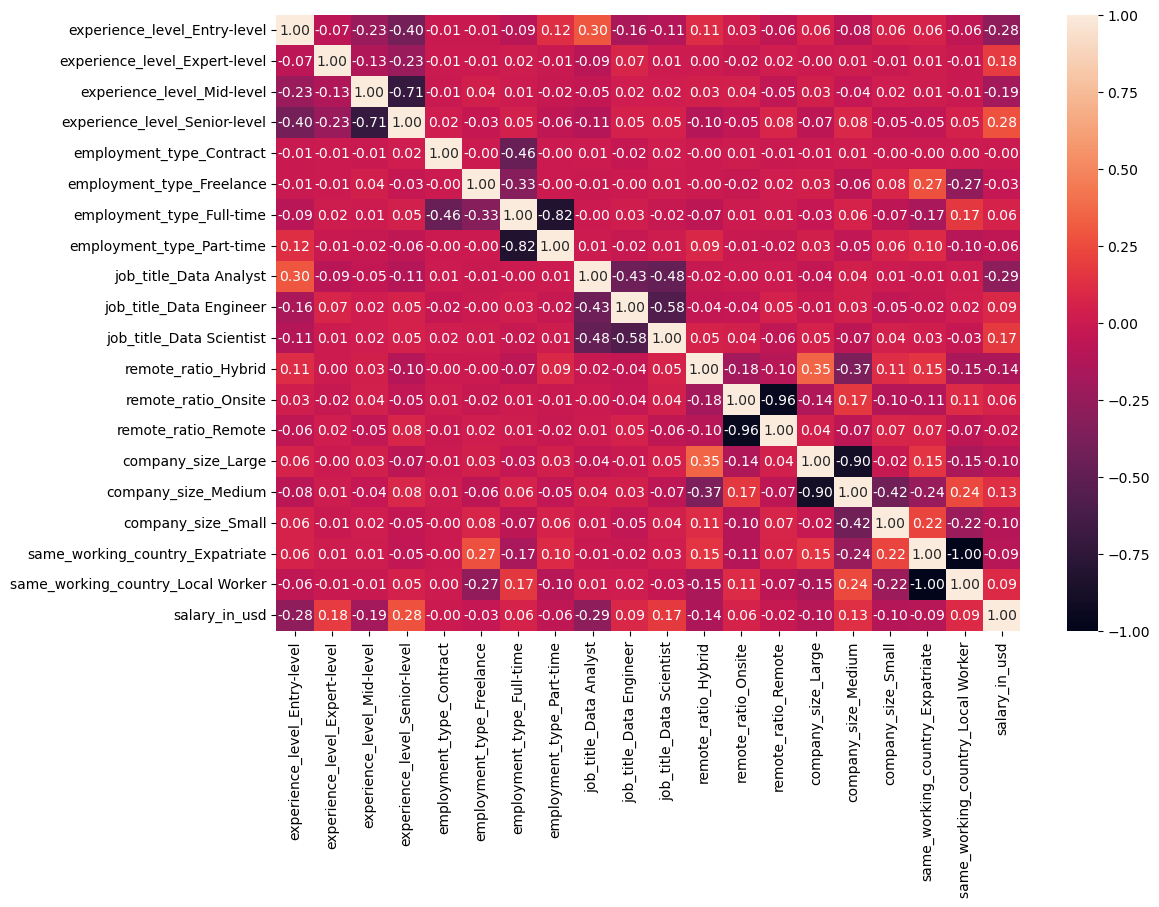

In [64]:
# heatmap correlation
train = pd.concat([feature_train, target_train], axis=1)
corr = train.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [65]:
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

# convert to numpy
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()

# train the model
multi_reg.fit(X_train, y_train)

LinearRegression()

In [66]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})

coef_df

,feature,coefficient
0,intercept,-1.197136e+18
1,experience_level_Entry-level,-3.692500e+16
2,experience_level_Expert-level,-3.692500e+16
3,experience_level_Mid-level,-3.692500e+16
4,experience_level_Senior-level,-3.692500e+16
5,employment_type_Contract,1.152813e+16
6,employment_type_Freelance,1.152813e+16
7,employment_type_Full-time,1.152813e+16
8,employment_type_Part-time,1.152813e+16
9,job_title_Data Analyst,-1.150127e+16


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Créer et entraîner un modèle de forêts aléatoires
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Créer et entraîner un modèle SVM
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Créer et entraîner un modèle de réseaux de neurones artificiels (ANN)
ann_model = MLPRegressor()
ann_model.fit(X_train, y_train)

# Faire des prédictions avec chaque modèle
rf_predictions = rf_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
ann_predictions = ann_model.predict(X_test)

# Évaluer les modèles
rf_mse = mean_squared_error(y_test, rf_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)
ann_mse = mean_squared_error(y_test, ann_predictions)

rf_r2 = r2_score(y_test, rf_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
ann_r2 = r2_score(y_test, ann_predictions)

print("Random Forest - Mean Squared Error:", rf_mse)
print("Random Forest - R-squared:", rf_r2)
print("SVM - Mean Squared Error:", svm_mse)
print("SVM - R-squared:", svm_r2)
print("Neural Network - Mean Squared Error:", ann_mse)
print("Neural Network - R-squared:", ann_r2)


C:\Users\ulukb\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ulukb\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ulukb\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ulukb\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the

NameError: name 'X_test' is not defined